# 0.0. Imports

In [62]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.display import HTML
from IPython.display import Image

### 0.1. Helper Functions

In [63]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize']=[25,12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container {widht:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [64]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


### 0.2. Loading Data

In [65]:
#Reading data
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 1.0. Data Description

### 1.1. Data Dimensions

In [66]:
print( 'Number of rows: {}'.format( df.shape[0] ) )
print( 'Number of columns: {}'.format( df.shape[1] ) )

Number of rows: 21613
Number of columns: 21


### 1.2. Data Types

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Main observations

In [68]:
# Column 'date' isn't on datetime format

# Features 'condition','grade','waterfront' and 'view' needs to be transformed on categorical variables for future analysis

# There are no 'null' values on our dataset

### 1.3. Change Types

#### 1.3.1 Adjusting column 'date'

In [69]:
# Converting 'date' to datetime format
df['date']=pd.to_datetime(df['date'],format='%Y/%m/%d')

#### 1.3.2 Converting numerical to categorical variables

In [70]:
#Understanding columns "condition", "grade", "waterfront" and "view"
print('Values from "condition" column: {}'.format(df['condition'].unique()))
print('Values from "grade" column: {}'.format(df['grade'].unique()))
print('Values from "waterfront" column: {}'.format(df['waterfront'].unique()))
print('Values from "view" column: {}'.format(df['view'].unique()))

Values from "condition" column: [3 5 4 1 2]
Values from "grade" column: [ 7  6  8 11  9  5 10 12  4  3 13  1]
Values from "waterfront" column: [0 1]
Values from "view" column: [0 3 4 2 1]


In [71]:
# Setting up 'condition' column
# 'condition' values goes from 1 to 5, so we'll be considering that:
    # 1 and 2 ---- bad condition
    # 3 ---------- regular condition
    # 4 and 5 ---- good condition
    
df['condition'] = df['condition'].apply (lambda x:
                                         'bad' if x < 3 else
                                         'regular' if x == 3 else
                                         'good')


# Setting up 'grade' column
# 'grade' values goes from 1 to 13, so we'll be considering that:
    # 1 to 3 ---- low design
    # 4 to 10---- average design
    # 11 to 13--- high condition
    
df['grade'] = df['grade'].apply (lambda x:
                                         'low design' if x <= 3 else
                                         'average design' if (x >= 4) & (x<=10) else
                                         'high design')

# Setting up 'waterfront' column
# 'waterfront' values 0 and 1, where:
    # 0 ---- without waterfront view
    # 1 ---- with waterfront view

df['waterfront'] = df['waterfront'].apply (lambda x:'no' if x == 0 else 'yes')


# Setting up 'view' column
# 'view' values goes from 0 to 4, so we'll be considering that:
    # 0 to 1 ---- bad
    # 2  ---- regular
    # 3 to 4 --- good
  
  
df['view'] = df['view'].apply (lambda x:
                                         'bad' if x <= 1 else
                                         'regular' if x == 2 else
                                         'good')

### 1.4. Checking duplicate values

In [72]:
# Check duplicate 'ID' values from df
aux = df[df['id'].duplicated(keep= False)]
print('There are {} duplicate values'.format( len(aux) ) )

There are 353 duplicate values


In [73]:
# There are 353 rows with duplicate ID's in our dataset

# On a first observation, it's possible to verify that the same 'id' has different prices. 
# Let's check if we have duplicate 'id' with the same 'price'

display(df[df[['id', 'price']].duplicated(keep= False)])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3950,1825069031,2014-08-14,550000.0,4,1.75,2410,8447,2.0,no,good,good,average design,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
3951,1825069031,2014-10-16,550000.0,4,1.75,2410,8447,2.0,no,good,good,average design,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14982,6308000010,2014-12-08,585000.0,3,2.50,2290,5089,2.0,no,bad,regular,average design,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
14983,6308000010,2015-04-23,585000.0,3,2.50,2290,5089,2.0,no,bad,regular,average design,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20053,8648900110,2014-05-05,555000.0,3,2.50,1940,3211,2.0,no,bad,regular,average design,1940,0,2009,0,98027,47.5644,-122.093,1880,3078
20054,8648900110,2014-08-26,555000.0,3,2.50,1940,3211,2.0,no,bad,regular,average design,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


In [74]:
# There are 6 registers with same 'id' and 'price'.
# For duplicate 'id' with same price we'll keep the first row.
df = df.drop_duplicates(subset= ['id', 'price'], keep= 'first')

# For the rest of duplicate values, we'll keep the last register since it's price is more current
df = df.drop_duplicates(subset= ['id'], keep= 'last')

In [75]:
# No more duplicate values
display(df[df['id'].duplicated(keep= False)])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


### 1.5. Checking Outliers

#### 1.5.1. Bedrooms outliers

Text(0, 0.5, 'sqft_living')

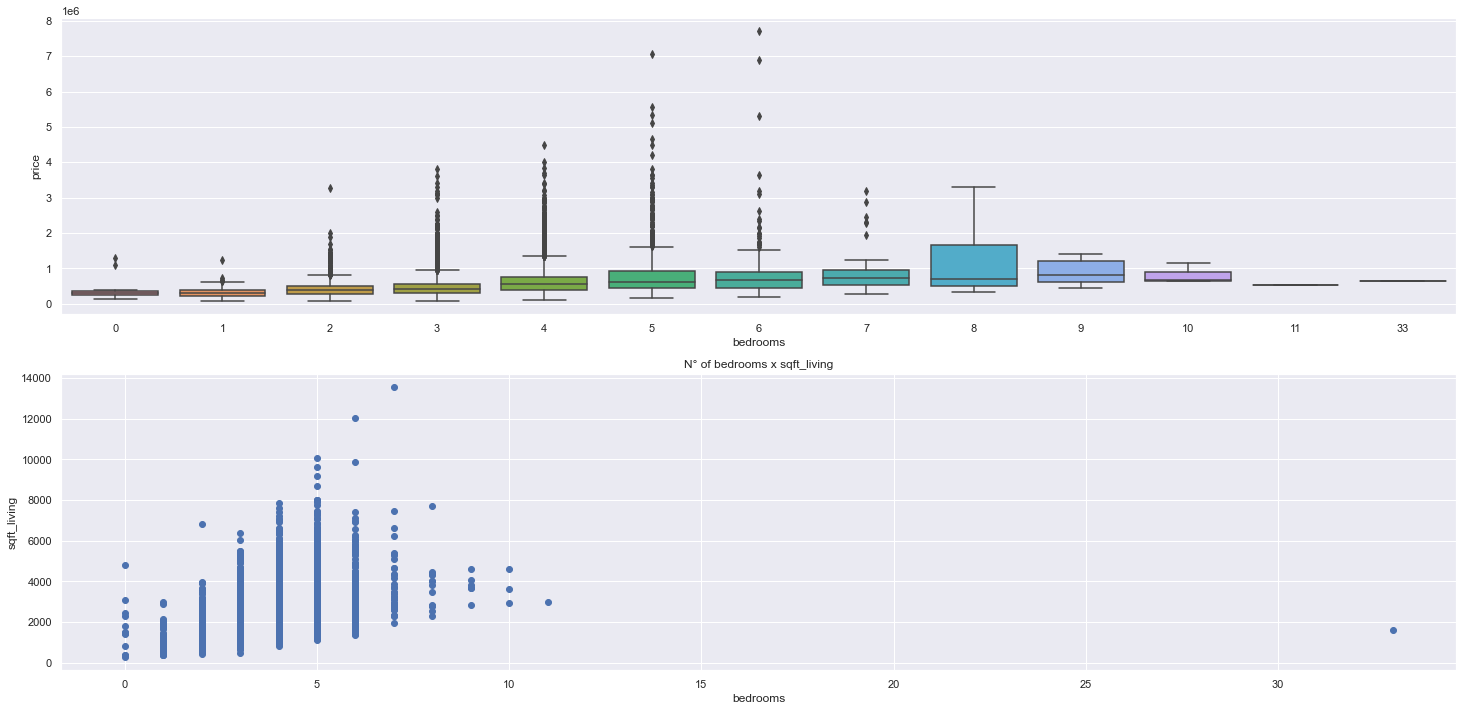

In [76]:
plt.subplot(2,1,1)
sns.boxplot( x='bedrooms', y='price', data=df )

plt.subplot(2,1,2)
plt.scatter(df['bedrooms'], df['sqft_living'])
plt.title("N° of bedrooms x sqft_living")
plt.xlabel("bedrooms")
plt.ylabel("sqft_living")

In [77]:
# As we can see, properties with more than 10 bedrooms have a small price and also a small sqft_living, 
# which does not make much sense. That way, we'll assume that properties with more than 10 bedrooms are outliers,
# probably due typing error.
# Their adjusted bedroom number will be based on the mean of other properties with simmilar square foot living.

# 11 bedrooms
sqft_11 = df['sqft_living'].loc[df['bedrooms']==11].reset_index(drop= True)[0]
proportion11 = sqft_11*0.3

correction11=df['bedrooms'].loc[(df['sqft_living'] > sqft_11-proportion11) & (df['sqft_living'] < sqft_11+proportion11)].mean()
print('correction for 11 bedrooms: {}'.format( correction11 ) )

#so we'll change our bedroom number from 11 to 4
df['bedrooms'].loc[df['bedrooms']==11] = 4



# 33 bedrooms
sqft_33 = df['sqft_living'].loc[df['bedrooms']==33].reset_index(drop= True)[0]
proportion33 = sqft_33*0.3

correction33=df['bedrooms'].loc[(df['sqft_living'] > sqft_33-proportion33) & (df['sqft_living'] < sqft_33+proportion33)].mean()
print('correction for 33 bedrooms: {}'.format( correction33 ) )

#so we'll change our bedroom number from 33 to 3
df['bedrooms'].loc[df['bedrooms']==33] = 3

correction for 11 bedrooms: 3.8605437915048237
correction for 33 bedrooms: 3.143379808167705


c:\users\mario\anaconda3\envs\house_rocket\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Text(0, 0.5, 'sqft_living')

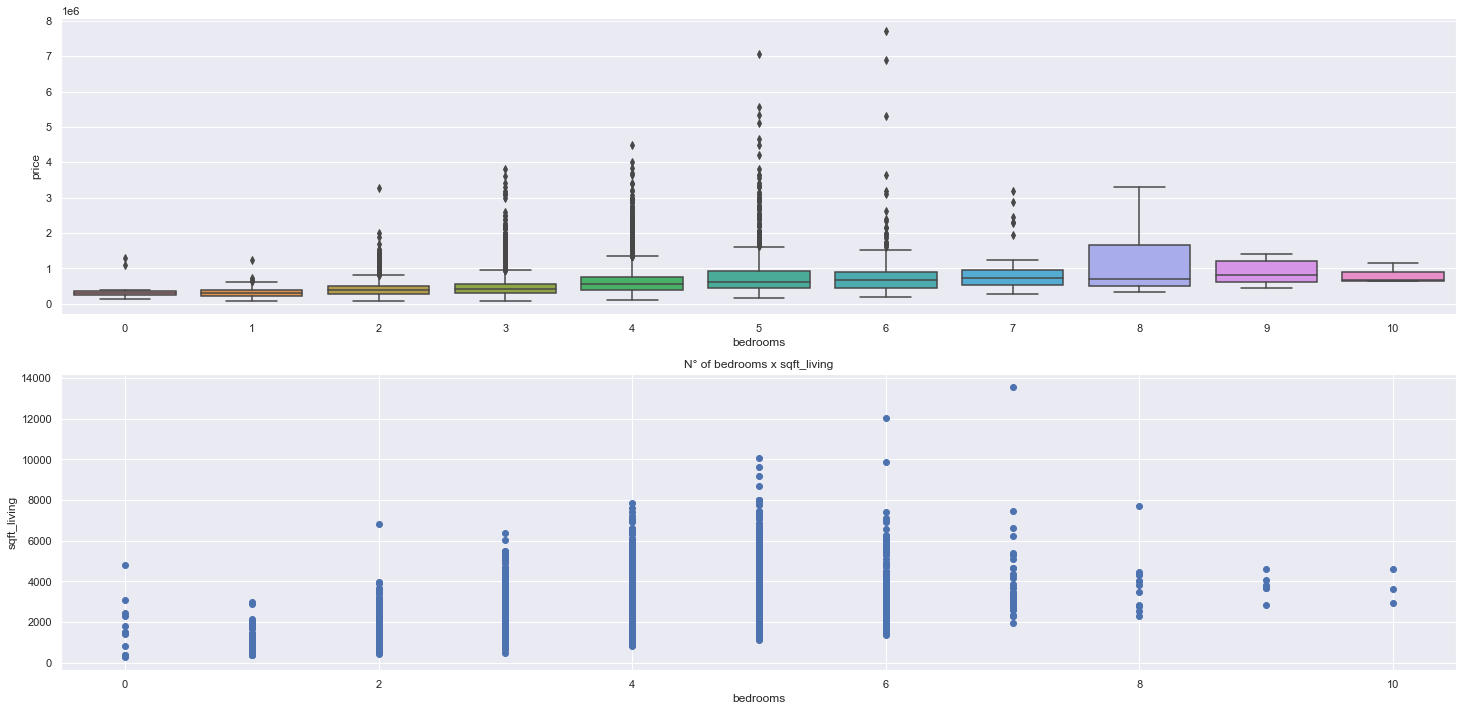

In [78]:
plt.subplot(2,1,1)
sns.boxplot( x='bedrooms', y='price', data=df )

plt.subplot(2,1,2)
plt.scatter(df['bedrooms'], df['sqft_living'])
plt.title("N° of bedrooms x sqft_living")
plt.xlabel("bedrooms")
plt.ylabel("sqft_living")

#### 1.5.2. sqft_lot outliers

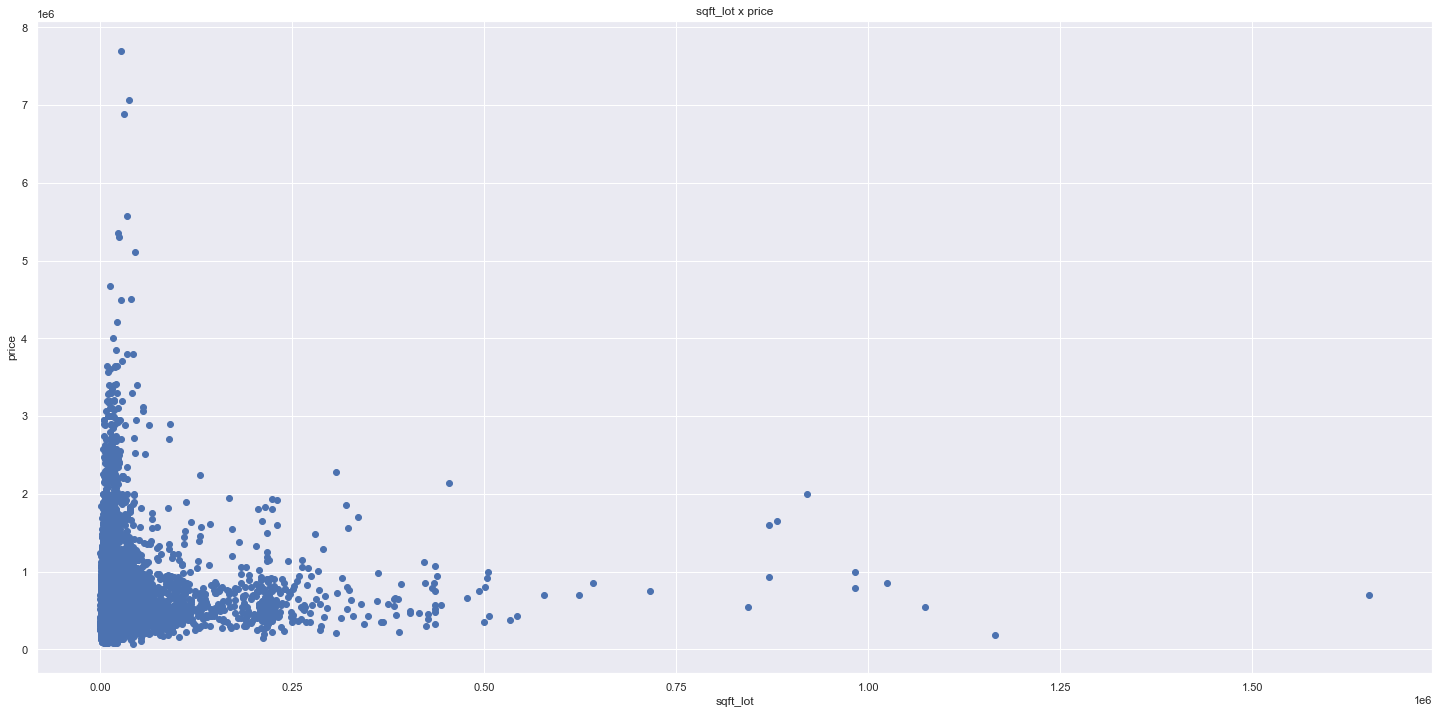

In [79]:
# Looking for outliers by comparing sqft_lot and price

plt.scatter(df['sqft_lot'], df['price'])
plt.title("sqft_lot x price")
plt.xlabel("sqft_lot")
plt.ylabel("price")
plt.show()

In [80]:
# We can verify some possible outliers for sqft_lot bigger than 750.000
# A few points have a price near from 2 million, so we'll keep those on our analysis
# Let's check those few points sqft_lot size and consider outliers the ones above

sqft_outliers=df[df['sqft_lot']>750000]

sqft_outliers.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1719,1020069017,2015-03-27,700000.0,4,1.00,1300,1651359,1.0,no,good,good,average design,1300,0,1920,0,98022,47.2313,-122.023,2560,425581
3949,722069232,2014-09-05,998000.0,4,3.25,3770,982998,2.0,no,bad,regular,average design,3770,0,1992,0,98058,47.4140,-122.087,2290,37141
4441,3626079040,2014-07-30,790000.0,2,3.00,2560,982278,1.0,no,bad,regular,average design,2560,0,2004,0,98014,47.6955,-121.861,1620,40946
4540,2522029039,2014-09-29,550000.0,3,2.00,3650,843309,2.0,no,bad,good,average design,3650,0,1991,0,98070,47.3627,-122.496,1870,273992
6691,2624089007,2015-03-20,1998000.0,2,2.50,3900,920423,2.0,no,bad,regular,high design,3900,0,2009,0,98065,47.5371,-121.756,2720,411962


mean price of sqft_outliers: 679250.0
corrected sqft_lot for sqft_outliers: 17132


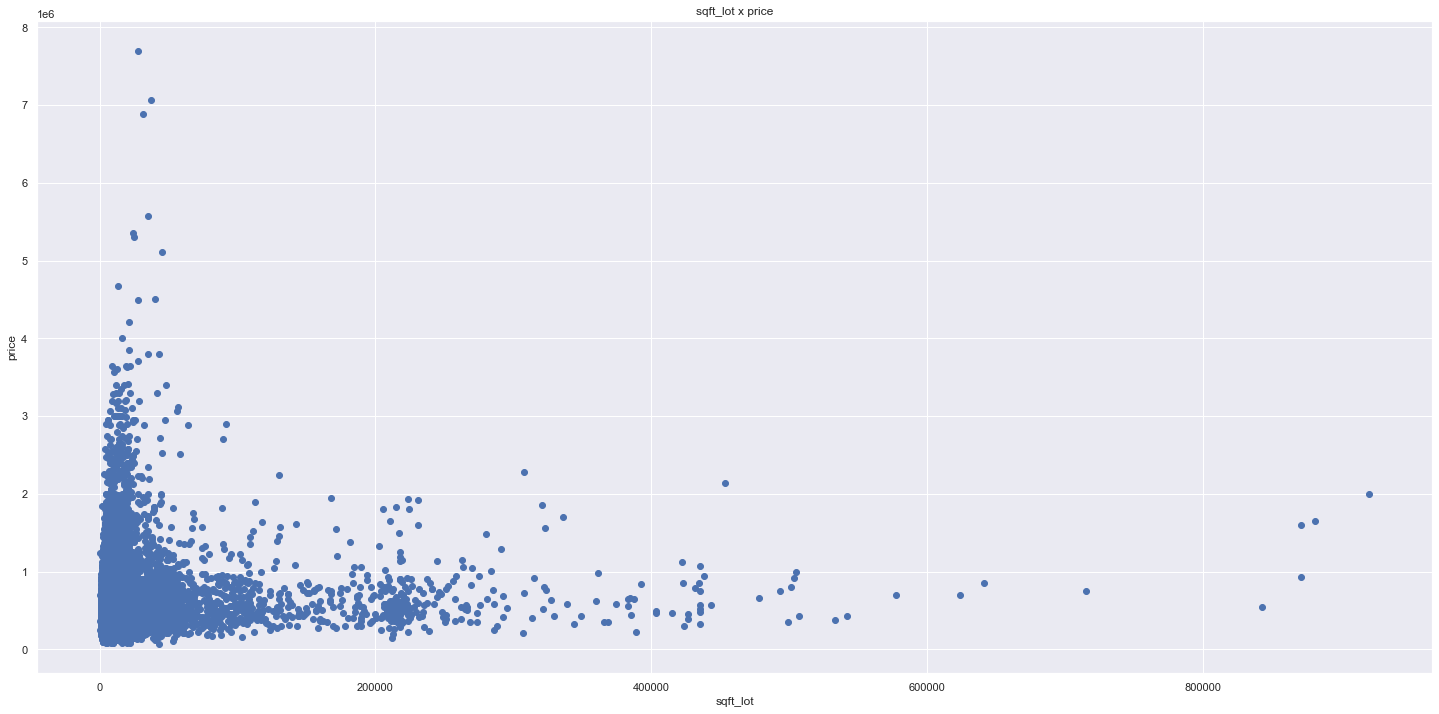

In [81]:
# Assuming that properties with sqft_lot bigger than 950.000 are outliers
sqft_outliers=df[df['sqft_lot']>950000]

# Let's verify their mean price and adjust the sqft_lot based on the rest of the dataset
sqft_out_mean_price = sqft_outliers['price'].mean()
print('mean price of sqft_outliers: {}'.format(sqft_out_mean_price))

# Calculate a proportion to filter dataset base
proportion = sqft_out_mean_price*0.1
correction_sqft=df[['price','sqft_lot']].loc[(df['price']>sqft_out_mean_price-proportion) & (df['price']<sqft_out_mean_price+proportion)]
correction_sqft=correction_sqft['sqft_lot'].mean()
print('corrected sqft_lot for sqft_outliers: {}'.format(int(correction_sqft)))

# Adjusting outliers
df.loc[df['sqft_lot']>950000,'sqft_lot']=correction_sqft


plt.scatter(df['sqft_lot'], df['price'])
plt.title("sqft_lot x price")
plt.xlabel("sqft_lot")
plt.ylabel("price")
plt.show()

# 2.0. EDA - Exploratory Data Analysis

### 2.1. Descriptive Statistical

In [82]:
num_attibutes = df.select_dtypes( include= ['int64','float64'])
num_attibutes = num_attibutes.iloc[:, 1: ]
num_attibutes = num_attibutes.drop(columns=['zipcode', 'lat','long'])

# central tendency : mean and median
mean = pd.DataFrame(num_attibutes.apply(np.mean, axis=0))
median = pd.DataFrame(num_attibutes.apply(np.median, axis=0))

# dispersion tendency: std, min and max
std = pd.DataFrame(num_attibutes.apply(np.std, axis=0))
min_ = pd.DataFrame(num_attibutes.apply(np.min, axis=0))
max_ = pd.DataFrame(num_attibutes.apply(np.max, axis=0))

att = pd.concat((max_, min_, mean, median,std), axis=1).reset_index()
att.columns = ('attributes','maximum','minimum','mean', 'median','std')
att

,attributes,maximum,minimum,mean,median,std
0,price,7700000.0,75000.0,541649.962726,450000.00,367306.361583
1,bedrooms,10.0,0.0,3.369845,3.00,0.905393
2,bathrooms,8.0,0.0,2.117349,2.25,0.769895
3,sqft_living,13540.0,290.0,2082.704936,1920.00,919.125029
4,sqft_lot,920423.0,520.0,14819.491045,7614.00,36763.790341
5,floors,3.5,1.0,1.496198,1.50,0.540376
6,sqft_above,9410.0,290.0,1790.960440,1560.00,829.007154
7,sqft_basement,4820.0,0.0,291.744495,0.00,442.771655
8,yr_built,2015.0,1900.0,1971.098433,1975.00,29.384591
9,yr_renovated,2015.0,0.0,84.729800,0.00,402.421625


### 2.2. Hypothesis  validation

#### H1 - Properties with a good condition and waterfront view are 50% more expensive on average than properties with good condition but without waterfront view

In [83]:
# Filtering our dataset
good_cond_waterfront = round(df['price'].loc[(df['waterfront'] == 'yes') & (df['condition'] == 'good')].mean(), 2)
good_cond_no_waterfront = round(df['price'].loc[(df['waterfront'] == 'no') & (df['condition'] == 'good')].mean(), 2)

print('Mean price of properties with good condition and waterfront view: US$ {}'.format(good_cond_waterfront))
print('Mean price of properties with good condition but without waterfront view: US$ {}'.format(good_cond_no_waterfront))

# Calculating proportion between than
proportion = round((good_cond_waterfront - good_cond_no_waterfront )*100 / good_cond_no_waterfront, 2)

print('Properties with good condition and waterfront view are {}% more expensive on average'.format(proportion) )

Mean price of properties with good condition and waterfront view: US$ 1537098.46
Mean price of properties with good condition but without waterfront view: US$ 533490.33
Properties with good condition and waterfront view are 188.12% more expensive on average


#### H2 -  Properties with building year before 1955 are cheaper on average

In [84]:
# Separating dataset 
df_h2_less = df.loc[df['yr_built']<1955]
df_h2_more = df.loc[df['yr_built']>=1955]

# Creating variables
before_1955 = df_h2_less['price'].mean()
after_1955 = df_h2_more['price'].mean()

print('Mean price of properties built before 1955: US$ {}'.format(round(before_1955,2)))
print('Mean price of properties built after 1955: US$ {}'.format(round(after_1955,2)))

# Calculating proportion between than
proportion2 = round((before_1955 - after_1955) * 100 / after_1955,2)
print('Properties built before 1955 are US$ {}% cheaper on average'.format(proportion2*-1))

Mean price of properties built before 1955: US$ 540100.38
Mean price of properties built after 1955: US$ 542265.19
Properties built before 1955 are US$ 0.4% cheaper on average


#### H3 - Properties without basement have a square footage of the land space 15% bigger than properties with it

In [85]:
# Creating variables
sqft_no_basement=round(df['sqft_lot'].loc[df['sqft_basement']==0].mean(),2)
sqft_yes_basement=round(df['sqft_lot'].loc[df['sqft_basement']!=0].mean(),2)

print('Average square footage of lands without basement: {}'.format(sqft_no_basement))
print('Average square footage of lands with basement: {}'.format(sqft_yes_basement))

# Calculating proportion between than
proportion3 = round(((sqft_no_basement - sqft_yes_basement) * 100 / sqft_yes_basement),2)
print('Properties without basement have an average square footage of the land {}% bigger than with basement'.format(proportion3))

Average square footage of lands without basement: 15886.45
Average square footage of lands with basement: 13170.46
Properties without basement have an average square footage of the land 20.62% bigger than with basement


#### H4 - The propertie's price growth YoY (year over year) it's 10%

In [86]:
# Creating column year
df['year'] = pd.DatetimeIndex(df['date']).year

# Analysing years separated
price_2014 = round(df['price'].loc[df['year']==2014].mean(),2)
price_2015 = round(df['price'].loc[df['year']==2015].mean(),2)

print('Average price on 2014: {}'.format(price_2014))
print('Average price on 2015: {}'.format(price_2015))

proportion4 = round(((price_2015 - price_2014) * 100 / price_2014),2)
print("The propertie's price growth YoY it's: {}%".format(proportion4))

Average price on 2014: 541337.59
Average price on 2015: 542298.14
The propertie's price growth YoY it's: 0.18%


#### H5 - Properties with 3 bathrooms had a MoM growth of 5%

In [87]:
# Filtering dataset by bathrooms = 3
df['month'] = pd.DatetimeIndex(df['date']).month
df_h5 = df[['price','month','year']].loc[df['bathrooms']==3].reset_index(drop=True)

# First month is 05/2014 and last month is 05/2015
# Number of months: 12
# Obtaining total price for first month and last month
first_month = df_h5['price'].loc[(df_h5['year']==2014) & (df_h5['month']==5)].sum()
last_month = df_h5['price'].loc[(df_h5['year']==2015) & (df_h5['month']==5)].sum()

# Calculating CMGR:
cmgr = round((((last_month/first_month) ** (1/12))-1)*100,2)
cmgr

print('There was a monthly decrease of: {}%'.format(cmgr))

There was a monthly decrease of: -9.87%


#### H6 - Properties with 2 or more floors are 40% more expensive on average than the others 

In [88]:
# Separating by floors bigger than 2
multiple_floors = round(df['price'].loc[df['floors']>=2].mean(),2)
single_floor = round(df['price'].loc[df['floors']<2].mean(),2)


proportion6 = round((multiple_floors - single_floor) * 100 / single_floor,2)

print('On average, properties with 2 or more floors are {}% more expensive'.format(proportion6))

On average, properties with 2 or more floors are 41.25% more expensive


### 2.3. Answering Business Questions

 #### Q1 - What are the properties that house rocket should buy, and for what price?

In [89]:
# First, let's group our dataset by zipcode
df_zipcode = df[['zipcode','price']].groupby(['zipcode']).median().reset_index()
df_zipcode.rename(columns={'price':'median price'},inplace=True)
df_zipcode.head()

,zipcode,median price
0,98001,260000.0
1,98002,235000.0
2,98003,269500.0
3,98004,1150000.0
4,98005,765475.0


In [90]:
# Merging the two datasets by column zipcode, adding a new column named median price on our original dataframe
df_buylist=pd.merge(df,df_zipcode,on='zipcode',how='inner')

In [91]:
# Creating a new column called 'Status', where we'll see if we should or shouldn't buy the property.
df_buylist['status']='NaN'

# First we'll sellect only properties with price less than median price and with regular/good condition
for row in range(len(df_buylist)):
    if (df_buylist.loc[row,'price']<df_buylist.loc[row,'median price'])&(df_buylist.loc[row,'condition']!='bad'):
        df_buylist.loc[row,'status']='buy'
    else:
        df_buylist.loc[row,'status']='not buy'

# Selecting only the properties to buy
df_buylist=df_buylist[df_buylist['status']=='buy'].reset_index()
df_buylist.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,median price,status
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,no,bad,regular,average design,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,279500.0,buy
1,1,4060000240,2014-06-23,205425.0,2,1.00,880,6780.0,1.0,no,bad,good,average design,880,0,1945,0,98178,47.5009,-122.248,1190,6780,2014,6,279500.0,buy
2,3,2976800796,2014-09-25,236000.0,3,1.00,1300,5898.0,1.0,no,bad,regular,average design,1300,0,1961,0,98178,47.5053,-122.255,1320,7619,2014,9,279500.0,buy
3,4,6874200960,2015-02-27,170000.0,2,1.00,860,5265.0,1.0,no,bad,regular,average design,860,0,1931,0,98178,47.5048,-122.272,1650,8775,2015,2,279500.0,buy
4,5,4268200055,2015-05-01,245000.0,3,1.75,1740,11547.0,1.0,no,bad,regular,average design,1740,0,1954,0,98178,47.4945,-122.220,880,78408,2015,5,279500.0,buy


In [92]:
# Exporting table with recomended properties to buy
df_buylist = df_buylist[['id','date', 'zipcode', 'condition','grade', 'price', 'median price', 'status']]
df_buylist.to_excel('properties_buy_list.xlsx')

#### Q2 - Once purchased, when it's the best time to sell it and for what price?

In [93]:
# Usually the end of spring and beggining of summer is the best period to sell properties
# We'll consider than summer season is the best period to sell properties

# winter (01/dec to 28/feb)
# spring (01/mar to 31/may)
# summer (01/jun to 31/aug)
# Autumn (01/sep to 30/nov)

# Setting up a new column 'season' based on our purchase day (date)
df_sell_list = df_buylist.copy()
df_sell_list['season'] = pd.DatetimeIndex(df_sell_list['date']).month
df_sell_list['season'] = df_sell_list['season'].apply (lambda x:
                                                       'winter' if (x >= 12) & (x < 3) else
                                                       'spring' if (x >= 3) & (x < 6) else
                                                       'summer' if (x >= 6) & (x < 9) else
                                                       'autumn')
df_sell_list.head(10)


,id,date,zipcode,condition,grade,price,median price,status,season
0,7129300520,2014-10-13,98178,regular,average design,221900.0,279500.0,buy,autumn
1,4060000240,2014-06-23,98178,good,average design,205425.0,279500.0,buy,summer
2,2976800796,2014-09-25,98178,regular,average design,236000.0,279500.0,buy,autumn
3,6874200960,2015-02-27,98178,regular,average design,170000.0,279500.0,buy,autumn
4,4268200055,2015-05-01,98178,regular,average design,245000.0,279500.0,buy,spring
5,3969300030,2014-12-29,98178,regular,average design,239900.0,279500.0,buy,autumn
6,1180003090,2014-09-06,98178,regular,average design,190000.0,279500.0,buy,autumn
7,561000075,2014-12-31,98178,good,average design,260000.0,279500.0,buy,autumn
8,3348401740,2015-01-27,98178,regular,average design,188000.0,279500.0,buy,autumn
9,5476200160,2014-07-25,98178,regular,average design,164808.0,279500.0,buy,summer


In [94]:
# Considering spring as the best season, properties that were bought on spring season we'll be sell with +10% of its price
# and propeties bought on other season with +30% of its price

for i in range(len(df_sell_list)):
    if df_sell_list.loc[i,'season']=='spring':
        df_sell_list.loc[i,'sell price']=df_sell_list.loc[i,'price']*1.1
    else:
        df_sell_list.loc[i,'sell price']=df_sell_list.loc[i,'price']*1.3

df_sell_list.head(10)

,id,date,zipcode,condition,grade,price,median price,status,season,sell price
0,7129300520,2014-10-13,98178,regular,average design,221900.0,279500.0,buy,autumn,288470.0
1,4060000240,2014-06-23,98178,good,average design,205425.0,279500.0,buy,summer,267052.5
2,2976800796,2014-09-25,98178,regular,average design,236000.0,279500.0,buy,autumn,306800.0
3,6874200960,2015-02-27,98178,regular,average design,170000.0,279500.0,buy,autumn,221000.0
4,4268200055,2015-05-01,98178,regular,average design,245000.0,279500.0,buy,spring,269500.0
5,3969300030,2014-12-29,98178,regular,average design,239900.0,279500.0,buy,autumn,311870.0
6,1180003090,2014-09-06,98178,regular,average design,190000.0,279500.0,buy,autumn,247000.0
7,561000075,2014-12-31,98178,good,average design,260000.0,279500.0,buy,autumn,338000.0
8,3348401740,2015-01-27,98178,regular,average design,188000.0,279500.0,buy,autumn,244400.0
9,5476200160,2014-07-25,98178,regular,average design,164808.0,279500.0,buy,summer,214250.4


In [95]:
# Creating a profit column and priorizing properties to sell
df_sell_list['profit'] = df_sell_list['sell price']-df_sell_list['price']
df_sell_list = df_sell_list.sort_values('profit',ascending=False).reset_index(drop=True)
df_sell_list.head(10)

,id,date,zipcode,condition,grade,price,median price,status,season,sell price,profit
0,6447300225,2014-11-06,98039,good,average design,1880000.0,1905000.0,buy,autumn,2444000.0,564000.0
1,3262300818,2015-02-27,98039,regular,high design,1865000.0,1905000.0,buy,autumn,2424500.0,559500.0
2,2525049266,2014-08-21,98039,regular,average design,1762000.0,1905000.0,buy,summer,2290600.0,528600.0
3,3262300235,2014-11-26,98039,good,average design,1555000.0,1905000.0,buy,autumn,2021500.0,466500.0
4,2525049246,2014-10-17,98039,good,average design,1550000.0,1905000.0,buy,autumn,2015000.0,465000.0
5,3025300225,2014-10-31,98039,good,average design,1450000.0,1905000.0,buy,autumn,1885000.0,435000.0
6,5427100150,2014-06-26,98039,regular,average design,1410000.0,1905000.0,buy,summer,1833000.0,423000.0
7,3625049079,2014-08-01,98039,regular,average design,1350000.0,1905000.0,buy,summer,1755000.0,405000.0
8,3262301355,2014-07-25,98039,good,average design,1320000.0,1905000.0,buy,summer,1716000.0,396000.0
9,3835502815,2014-09-25,98039,regular,average design,1260000.0,1905000.0,buy,autumn,1638000.0,378000.0


In [96]:
# Calculating the total profit possible
total_profit = round(df_sell_list['profit'].sum(),2)
print('total profit: {}'.format(total_profit))

total profit: 991216453.6


In [97]:
# Exporting table with properties to sell sorted by profit 
df_sell_list.to_excel('properties_sell_list.xlsx')